# Movie Recommendation System



# Overview

The System will give users who interact recommendations for movies to watch based on previosly watched

# Data Understanding

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
  - GroupLens research lab at the University of Minnesota dataset on movies , a dataset containing 100,000 user ratings
- What do the data represent? Who is in the sample and what variables are included?
  - the data presents movie rated, genres and tags all in different datasets
- What is the target variable?
  - Target is to create recomendation of movies for old and new users
- What are the properties of the variables you intend to use?
  - movieId, title, genres, rating and tag

## Import Libraries and data

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
ratings = ('./ml-latest-small/ratings.csv')
movies = ('./ml-latest-small/movies.csv')
tags = ('./ml-latest-small/tags.csv')

In [3]:
ratingsdf = pd.read_csv(ratings)
moviesdf = pd.read_csv(movies)
tagsdf = pd.read_csv(tags)

In [4]:
ratingsdf.shape

(100836, 4)

In [5]:
moviesdf.shape

(9742, 3)

In [6]:
tagsdf.shape

(3683, 4)

In [7]:
ratingsdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
moviesdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
tagsdf.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Data Preprocessing

### Ratings Data

In [10]:
# Step 1: Check for missing values
print(ratingsdf.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [11]:
# Step 2: Drop the 'timestamp' column 
ratingsdf.drop(columns=['timestamp'], inplace=True)

In [12]:
# Step 3: Ensure data types are correct
ratingsdf['userId'] = ratingsdf['userId'].astype(int)
ratingsdf['movieId'] = ratingsdf['movieId'].astype(int)
ratingsdf['rating'] = ratingsdf['rating'].astype(float)

In [13]:
ratingsdf

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


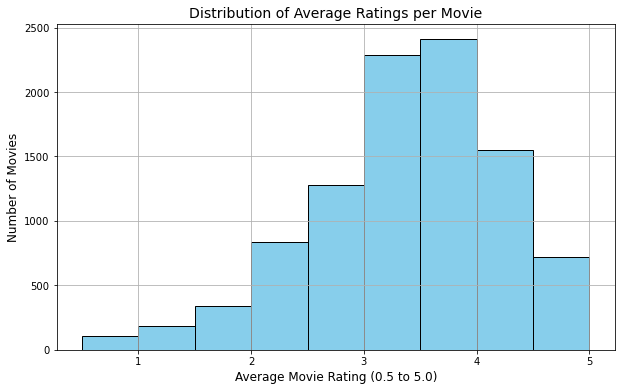

In [14]:
# Step 1: Group ratings by movieId and calculate the mean rating per movie
average_ratings = ratingsdf.groupby('movieId')['rating'].mean()

# Step 2: Plot histogram of the average ratings for each movie
plt.figure(figsize=(10, 6))
plt.hist(average_ratings, bins=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], edgecolor='black', color='skyblue')

# Step 3: Set labels and title
plt.title('Distribution of Average Ratings per Movie', fontsize=14)
plt.xlabel('Average Movie Rating (0.5 to 5.0)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Show plot
plt.grid(True)
plt.show()

### Tags Data

In [15]:
# Step 1: Check for missing values
print(tagsdf.isnull().sum())

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [16]:
# Step 2: Drop the 'timestamp' column 
tagsdf.drop(columns=['timestamp'], inplace=True)

In [17]:
# Step 3: Convert tags to lowercase and remove any extra spaces
tagsdf['tag'] = tagsdf['tag'].str.lower().str.strip()


In [18]:
# Step 4: Aggregate tags by movieId
# Group tags by movieId, and combine all tags for a movie into a single string separated by space
tagsdf = tagsdf.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()


In [19]:
tagsdf.head()

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game robin williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


### Movies Data

In [20]:
# Step 1: Check for missing values
print(moviesdf.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


In [21]:
# Step 3: Split genres
# Create a list of genres for each movie
moviesdf['genres'] = moviesdf['genres'].map(lambda x: x.lower().split('|'))

moviesdf.head()


,movieId,title,genres
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji (1995),"[adventure, children, fantasy]"
2,3,Grumpier Old Men (1995),"[comedy, romance]"
3,4,Waiting to Exhale (1995),"[comedy, drama, romance]"
4,5,Father of the Bride Part II (1995),[comedy]


In [22]:
# Step 1: Convert genres list to string
moviesdf['genres'] = moviesdf['genres'].apply(lambda x: ' '.join(x))

In [23]:
moviesdf

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),action animation comedy fantasy
9738,193583,No Game No Life: Zero (2017),animation comedy fantasy
9739,193585,Flint (2017),drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),action animation


# Recommendation Systems

In [24]:
# Install dependacies
from surprise import Dataset, Reader, KNNBasic
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

# User-Based Recomendation system

 **Using Pivot table and Sparse matrix**
+ recommendations based on what other users rate watched movies
+ recommended movie has not been watched by user 

In [25]:
# Create a user-item matrix (rows are userId, columns are movieId) 
# and Fill NaN values with 0
ratings = ratingsdf.pivot_table(index=['userId'], 
                                        columns=['movieId'],
                                        values='rating').fillna(0)
ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Convert the matrix to a sparse matrix format to optimize memory usage
user_item_sparse = csr_matrix(ratings.values)

In [27]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_sparse)

# Convert to a DataFrame for easy handling
user_similarity_df = pd.DataFrame(user_similarity, index=ratings.index, columns=ratings.index)


In [28]:
user_similarity_df.head()
# The similarity matrix calculats user-user similarity 
# using the cosine similarity which compares how similar 
# user are based on their rating pattern. 
# This is why the column names have similar names 


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [29]:
#create a function that produce top 10 recommended movie ids from a specified user 
def get_user_recommendations_with_titles(target_user_id, user_similarity_df, ratings, moviesdf, top_n=10):
    # Get similarity scores for the target user with all other users
    similar_users = user_similarity_df[target_user_id]
    
    # Sort users by similarity score
    similar_users = similar_users.sort_values(ascending=False)
    
    # Get the movies the target user has already rated
    user_ratings = ratings.loc[target_user_id]
    rated_movies = user_ratings[user_ratings > 0].index.tolist()

    # Initialize an empty list to store weighted ratings for recommendations
    movie_scores = {}

    # Loop through similar users
    for similar_user_id in similar_users.index[1:]:  # Skip the first one (self)
        # Get the ratings of the similar user
        similar_user_ratings = ratings.loc[similar_user_id]
        
        # Loop through the movies rated by the similar user
        for movie_id, rating in similar_user_ratings.items():
            if movie_id not in rated_movies:  # Only consider movies not rated by the target user
                if movie_id not in movie_scores:
                    movie_scores[movie_id] = 0
                # Add the rating of the similar user weighted by the similarity score
                movie_scores[movie_id] += rating * similar_users[similar_user_id]

    # Sort the movie scores in descending order to get the top recommendations
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top N recommended movies Ids
    top_movie_ids = [movie_id for movie_id, score in recommended_movies[:top_n]]

   # Map movie IDs back to movie titles using moviesdf
    top_movie_titles = moviesdf[moviesdf['movieId'].isin(top_movie_ids)]['title'].tolist()

    # Return the movie titles of the recommended movies
    return top_movie_titles

In [31]:
# lets use user function to get recommended movie titles
recommended_movie_titles = get_user_recommendations_with_titles(target_user_id=1, 
                                                                user_similarity_df=user_similarity_df, 
                                                                ratings=ratings, 
                                                                moviesdf=moviesdf, 
                                                                top_n=10)

# Show the recommended movie titles
recommended_movie_titles


['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Apollo 13 (1995)',
 'Shawshank Redemption, The (1994)',
 'Aladdin (1992)',
 'Terminator 2: Judgment Day (1991)',
 'Godfather, The (1972)',
 'Sixth Sense, The (1999)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Lord of the Rings: The Return of the King, The (2003)']

# Item-Item Based Recommendation System

In [32]:
# Transpose the ratings matrix to have movies as rows
movie_ratings_sparse = csr_matrix(ratings.T.values)

# Compute cosine similarity between items (movies)
item_similarity = cosine_similarity(movie_ratings_sparse)

# Convert to DataFrame for easy handling
item_similarity_df = pd.DataFrame(item_similarity, 
                                  index=ratings.columns, 
                                  columns=ratings.columns)

In [33]:
item_similarity_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def get_item_recommendations_with_titles(target_itemuser_id, item_similarity_df, ratings, moviesdf, top_n=10):
    # Get the ratings of the target user
    user_ratings = ratings.loc[target_itemuser_id]
    
    # Get the movies the target user has already rated
    rated_movies = user_ratings[user_ratings > 0].index.tolist()

    # Initialize an empty dictionary to store movie scores
    movie_scores = {}

    # Loop through the movies the user has rated
    for movie_id in rated_movies:
        # Get the similarity scores for the current movie with all other movies
        similar_movies = item_similarity_df[movie_id]
        
        # Loop through similar movies
        for similar_movie_id, similarity_score in similar_movies.items():
            # Only consider movies the user hasn't already rated
            if similar_movie_id not in rated_movies:
                if similar_movie_id not in movie_scores:
                    movie_scores[similar_movie_id] = 0
                # Add the weighted score based on the similarity and the user's rating of the movie
                movie_scores[similar_movie_id] += similarity_score * user_ratings[movie_id]

    # Sort the movie scores in descending order to get the top recommendations
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top N recommended movies
    top_movie_ids = [movie_id for movie_id, score in recommended_movies[:top_n]]
    
    # Map movie IDs back to movie titles using moviesdf
    top_movie_titles = moviesdf[moviesdf['movieId'].isin(top_movie_ids)]['title'].tolist()

    # Return the movie titles of the recommended movies
    return top_movie_titles


In [35]:
# lets use item function to get recommended movie titles
recommended_movie_titles = get_item_recommendations_with_titles(target_itemuser_id=1, item_similarity_df=item_similarity_df, ratings=ratings, moviesdf=moviesdf, top_n=10)

# Show the recommended titles
recommended_movie_titles


['Terminator 2: Judgment Day (1991)',
 '2001: A Space Odyssey (1968)',
 'Die Hard (1988)',
 'Aliens (1986)',
 'Mars Attacks! (1996)',
 'Fifth Element, The (1997)',
 'Breakfast Club, The (1985)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'Sixth Sense, The (1999)',
 "Ferris Bueller's Day Off (1986)"]

# Content Based recommendation System

### Using count vectorizer on the genres of movies

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Create the CountVectorizer model
count_vectorizer = CountVectorizer()
genre_matrix = count_vectorizer.fit_transform(moviesdf['genres'])

In [32]:
# Step 3: Compute the cosine similarity
content_similarity = cosine_similarity(genre_matrix, genre_matrix)

In [33]:
# Step 4: Create a function to get movie recommendations
def get_recommendations(title, cosine_sim=content_similarity):
    # Get the index of the movie that matches the title
    idx = moviesdf[moviesdf['title'] == title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return moviesdf['title'].iloc[movie_indices]


In [ ]:
# Example: Get recommendations
get_recommendations('No Game No Life: Zero (2017)')

# Collaborative Filtering

In [35]:
# Function to get movies rated by a specific user
def get_user_top_movies(user_id, ratings_df, top_n=5):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    top_movies = user_ratings.sort_values(by='rating', ascending=False).head(top_n)
    return top_movies['movieId'].values

In [36]:
# Recommend movies based on similar content to top-rated movies of a user
def recommend_movies_based_on_ratings(user_id, ratings_df, movies_df, cosine_sim, top_n=5):
    # Get top-rated movies by the user
    top_movies = get_user_top_movies(user_id, ratings_df)
    
    # Store similarity scores for all movies
    similarity_scores = []
    
    # For each top-rated movie, find similar movies
    for movie_id in top_movies:
        idx = movies_df[movies_df['movieId'] == movie_id].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        similarity_scores.extend(sim_scores)
    
    # Sort the movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N recommended movie indices
    recommended_indices = [i[0] for i in similarity_scores[:top_n]]
    
    # Return the recommended movie titles
    recommended_movies = movies_df.iloc[recommended_indices]['title'].unique()
    return recommended_movies

In [ ]:
# Example usage:
user_id = 15  # Choose a user ID
recommended_movies = recommend_movies_based_on_ratings(user_id, ratingsdf, moviesdf, content_similarity, top_n=10)
print(f"Recommended movies for User {user_id}:")
print(recommended_movies)

# Content-Based Filtering

### Using tfid vectorizer on all words

In [39]:
# Lets create copies of our datasets that we can merge
ratings_merge = ratingsdf.copy()
movies_merge = moviesdf.copy()
tags_merge = tagsdf.copy()

In [40]:
# Step 1: Merge moviesdf and ratingsdf on movieId
movies_ratings_df = pd.merge(movies_merge, ratings_merge, on='movieId', how='inner')

# Step 2: Left join with tagsdf to add tags (if available)
merged_df = pd.merge(movies_ratings_df, tags_merge, on='movieId', how='left')

# Step 3: Fill NaN values in the 'tag' column with an empty string (if some movies have no tags)
merged_df['tag'] = merged_df['tag'].fillna('')

In [41]:
# Step 1: Combine relevant features into a single string
merged_df['content'] = merged_df['title'] + ' ' + merged_df['genres'] + ' ' + merged_df['tag']

In [42]:
# Step 2: Create the TF-IDF matrix for the 'tag' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['content'])

In [ ]:
# Step 3: Apply Truncated SVD to reduce the dimensionality
# Reducing to 100 components to avoid memory issues
svd = TruncatedSVD(n_components=50)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

In [45]:
# Step 4: Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

In [ ]:
# Step 5: Create a function to get the movie title from the index
indices = pd.Series(merged_df.index, index=merged_df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return merged_df['title'].iloc[movie_indices]

In [ ]:
# Example usage:
recommendations = get_recommendations('Toy Story')
print(recommendations)

# Evalution